# RandomForestClassifier (Iris dataset)

---
* author:  [Prasert Kanawattanachai](prasert.k@chula.ac.th)
* YouTube: https://www.youtube.com/prasertcbs
* github: https://github.com/prasertcbs/scikitlearn_tutorial
* [Chulalongkorn Business School](https://www.cbs.chula.ac.th/en/)
---

In [1]:
from IPython.display import YouTubeVideo
# YouTubeVideo('', width=720, height=405)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
print(f"pandas  version = {pd.__version__}")
print(f"numpy   version = {np.__version__}")
print(f"seaborn version = {sns.__version__}")

pandas  version = 2.1.4
numpy   version = 1.26.3
seaborn version = 0.12.2


In [4]:
pd.Timestamp.now()

Timestamp('2024-03-26 22:22:34.172757')

In [5]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/iris.csv')
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
24,4.8,3.4,1.9,0.2,setosa
107,7.3,2.9,6.3,1.8,virginica
31,5.4,3.4,1.5,0.4,setosa
112,6.8,3.0,5.5,2.1,virginica
77,6.7,3.0,5.0,1.7,versicolor
86,6.7,3.1,4.7,1.5,versicolor
40,5.0,3.5,1.3,0.3,setosa
87,6.3,2.3,4.4,1.3,versicolor
146,6.3,2.5,5.0,1.9,virginica
133,6.3,2.8,5.1,1.5,virginica


In [6]:
df.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [7]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

<Axes: xlabel='petal_length', ylabel='sepal_width'>

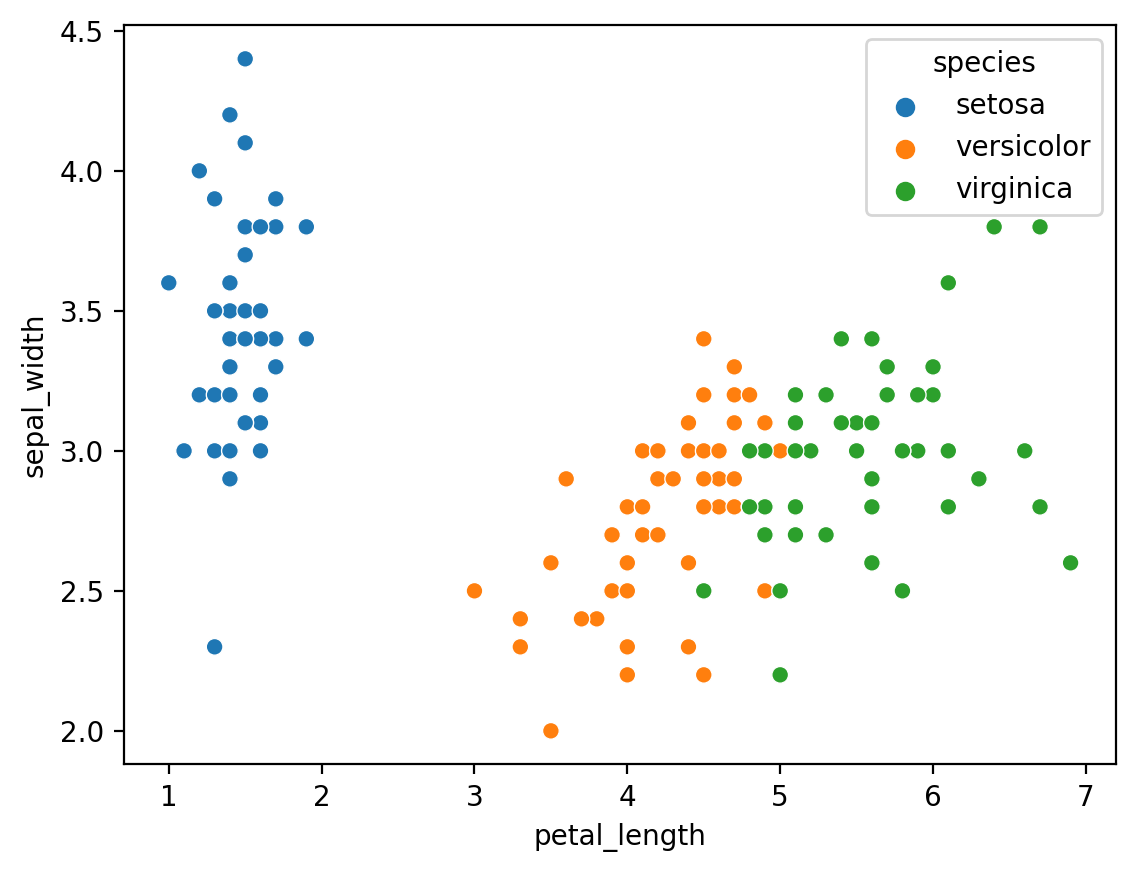

In [8]:
sns.scatterplot(data=df, x="petal_length", y="sepal_width", hue='species')

c:\Users\prasert\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\prasert\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\prasert\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\prasert\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

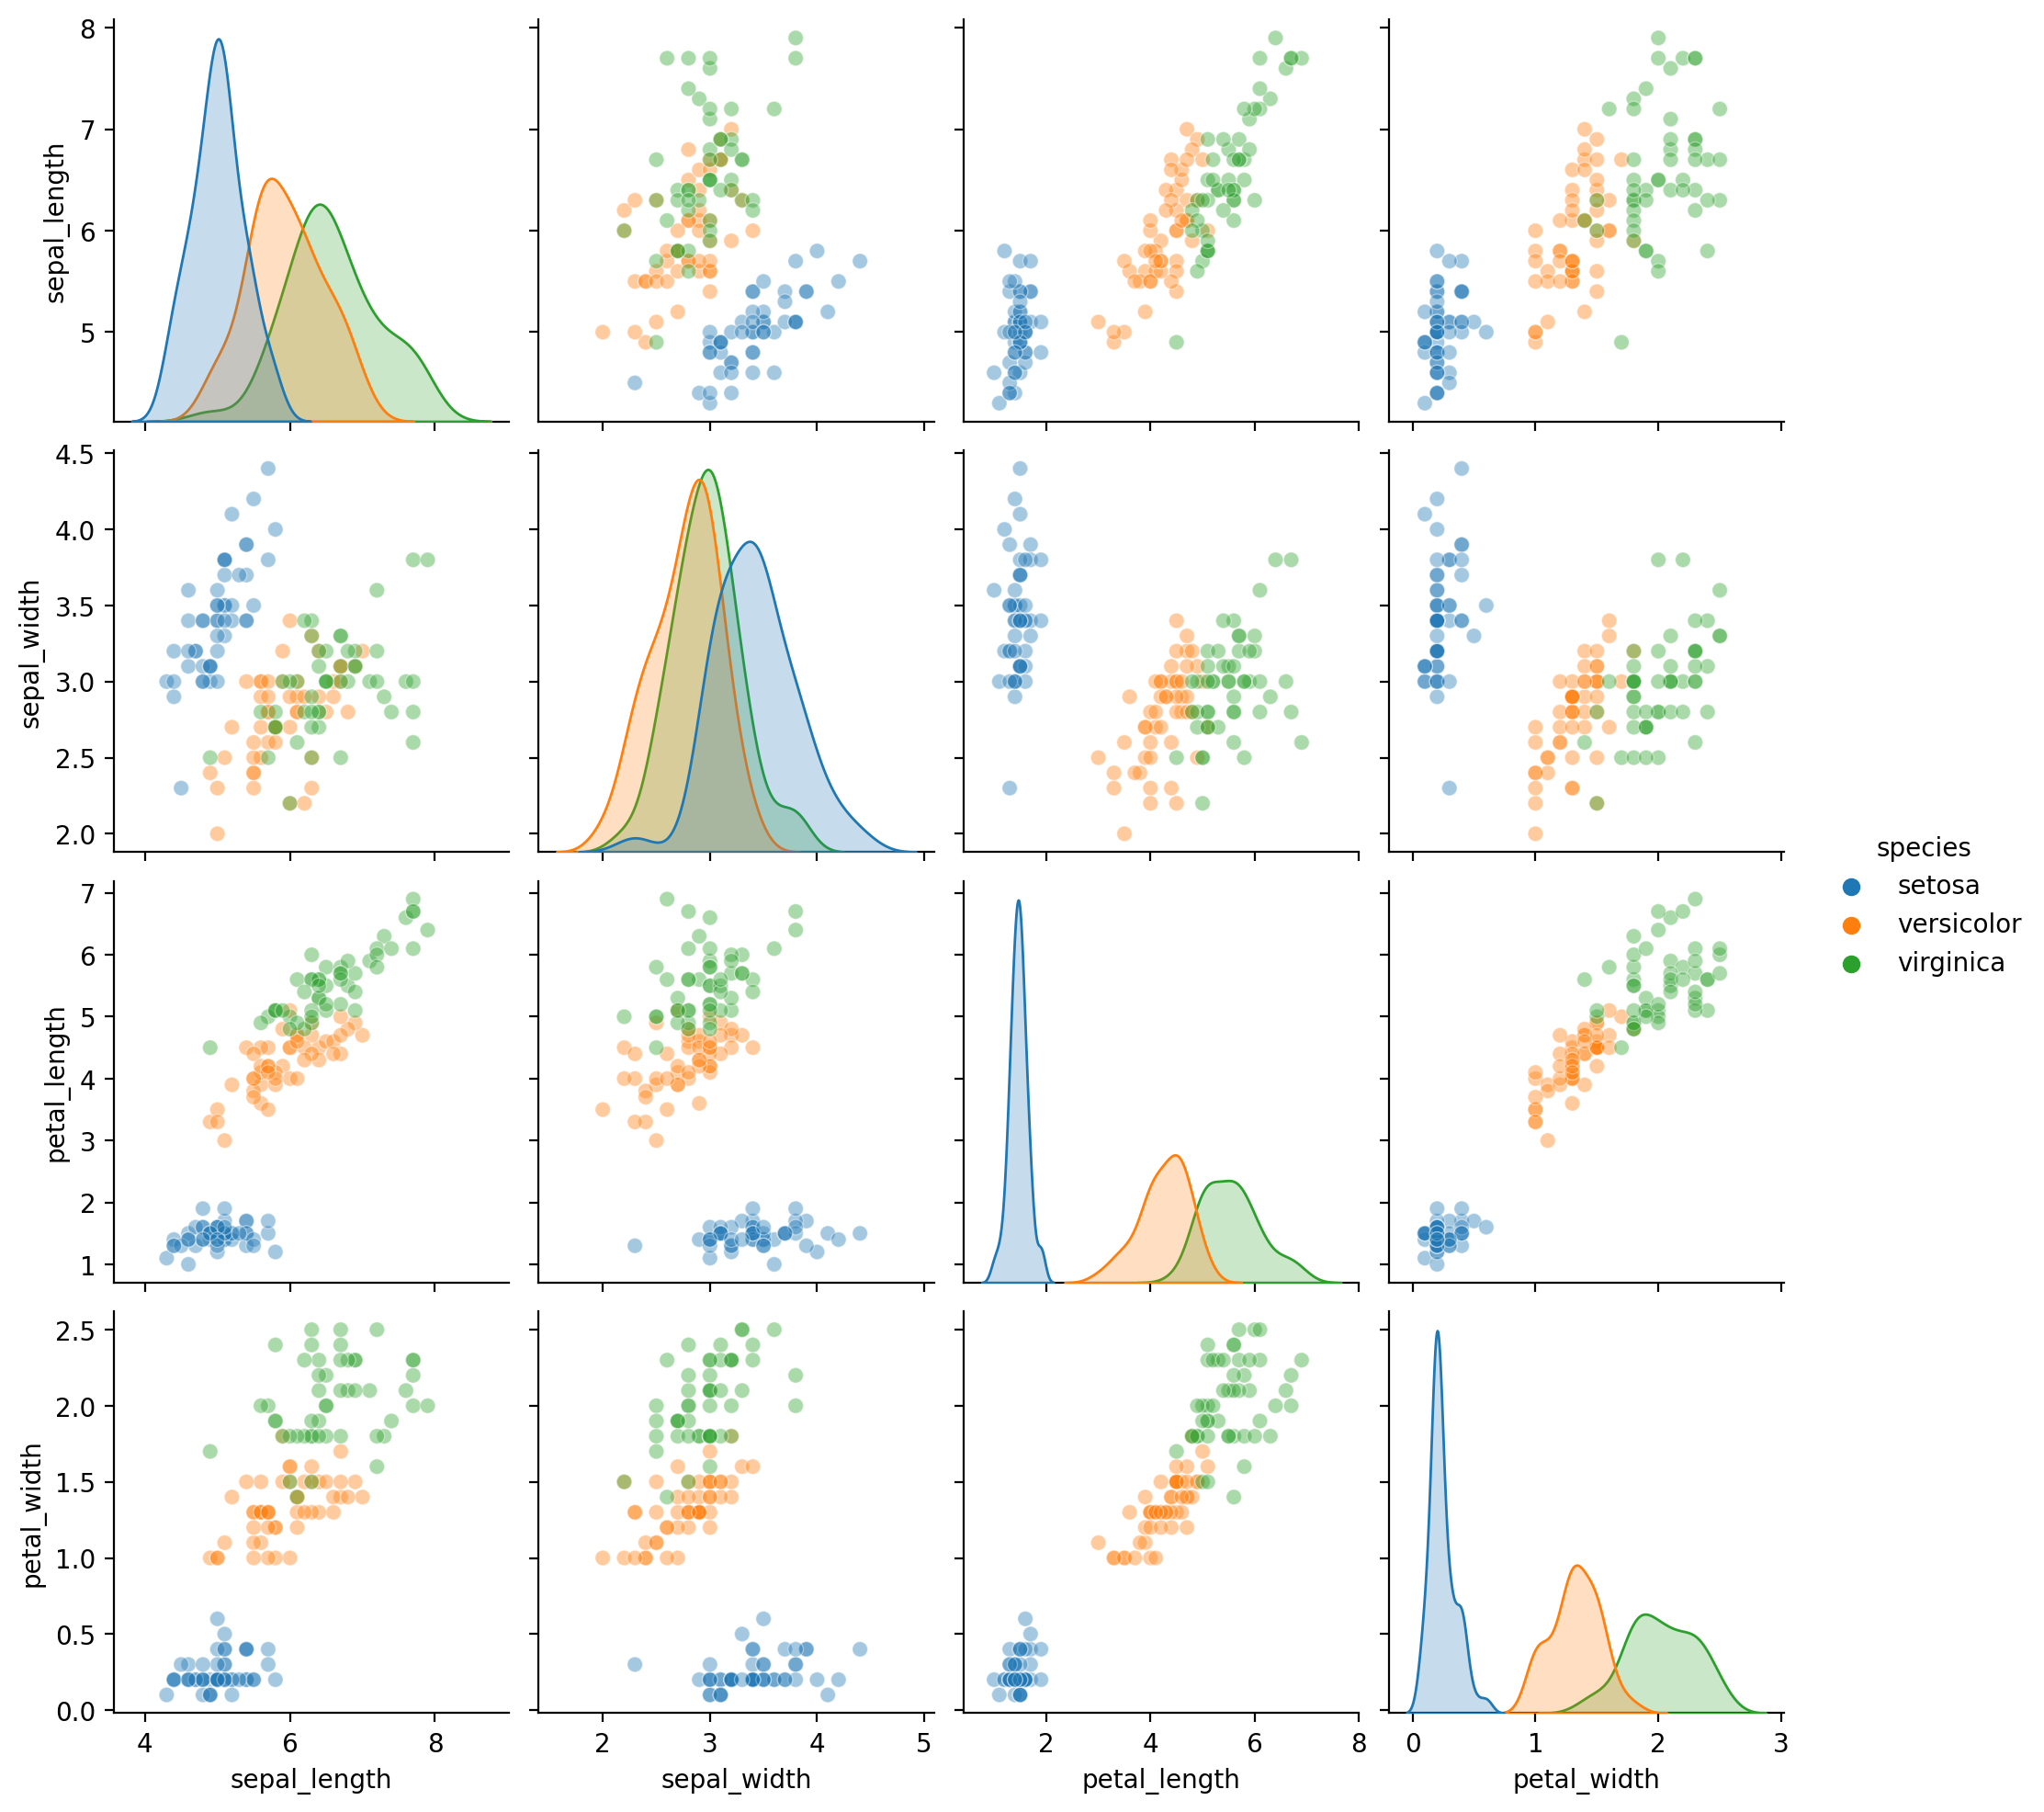

In [9]:
sns.pairplot(df, vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], 
             hue='species', 
#              markers=['o', 'D', '+'],
             plot_kws={'alpha': .4});

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Scikit-learn: Classifier

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

In [ ]:
df.columns

In [13]:
test_size=0.2
X_train, X_test, y_train, y_test = train_test_split(
    df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], 
    df.species, 
    test_size=test_size, random_state=7)

In [14]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
126,6.2,2.8,4.8,1.8
79,5.7,2.6,3.5,1.0
22,4.6,3.6,1.0,0.2
139,6.9,3.1,5.4,2.1
74,6.4,2.9,4.3,1.3


In [15]:
y_train.head()

126     virginica
79     versicolor
22         setosa
139     virginica
74     versicolor
Name: species, dtype: object

In [16]:
X_test.head()

,sepal_length,sepal_width,petal_length,petal_width
149,5.9,3.0,5.1,1.8
84,5.4,3.0,4.5,1.5
40,5.0,3.5,1.3,0.3
66,5.6,3.0,4.5,1.5
106,4.9,2.5,4.5,1.7


# Scikit-learn: RandomForestClassifier

In [17]:
model = RandomForestClassifier(n_estimators=10)
model

RandomForestClassifier(n_estimators=10)

In [18]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [19]:
model.score(X_train, y_train)

0.9916666666666667

In [20]:
model.score(X_test, y_test)

0.9

In [21]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
18,5.7,3.8,1.7,0.3,setosa
5,5.4,3.9,1.7,0.4,setosa
136,6.3,3.4,5.6,2.4,virginica
113,5.7,2.5,5.0,2.0,virginica
61,5.9,3.0,4.2,1.5,versicolor
29,4.7,3.2,1.6,0.2,setosa
132,6.4,2.8,5.6,2.2,virginica
40,5.0,3.5,1.3,0.3,setosa
0,5.1,3.5,1.4,0.2,setosa
86,6.7,3.1,4.7,1.5,versicolor


In [22]:
model.predict([
    [3, 4, 5, 6],
    [3, 4, 5, 2],
    [5, 3.5, 1.5, .2]
              ])

c:\Users\prasert\miniconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['virginica', 'virginica', 'setosa'], dtype=object)

In [23]:
y_pred=model.predict(X_test)

In [30]:
cm=confusion_matrix(y_test, y_pred, labels=model.classes_)
cm

array([[ 7,  0,  0],
       [ 0, 10,  2],
       [ 0,  1, 10]], dtype=int64)

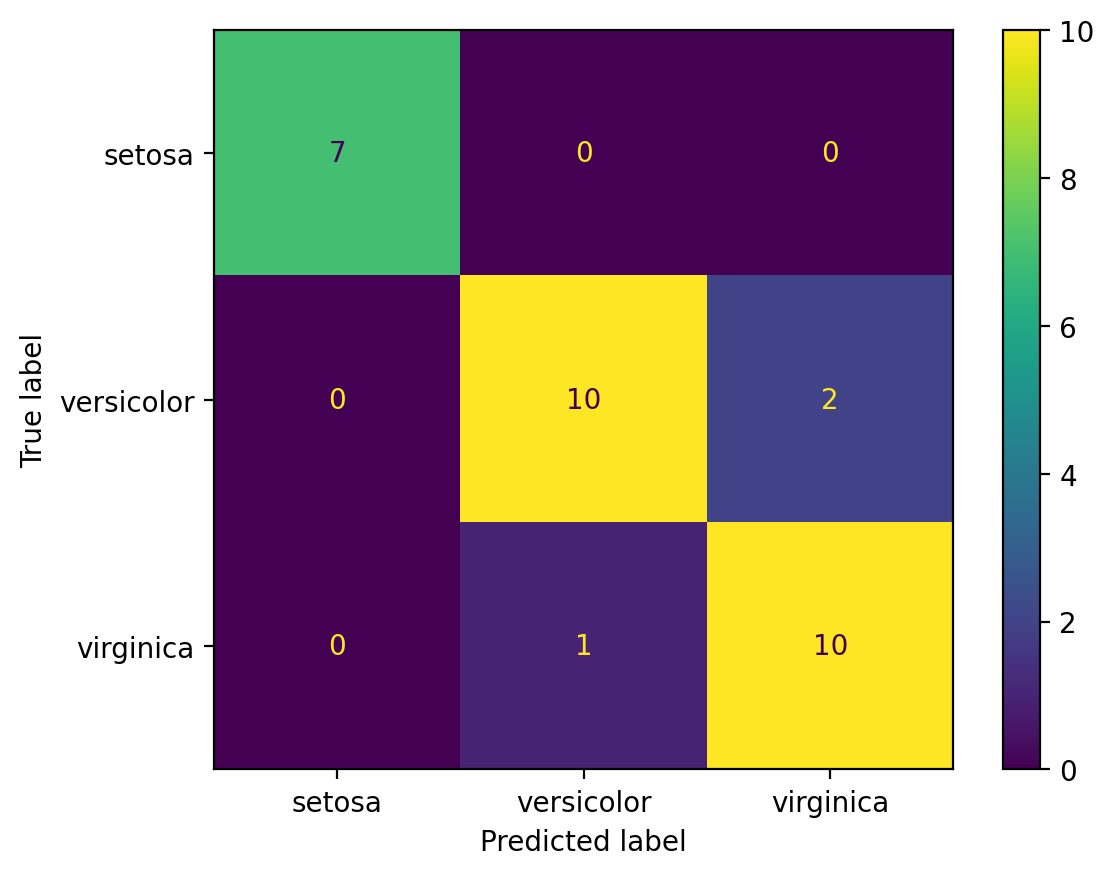

In [31]:
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

In [32]:
print(accuracy_score(y_test, y_pred))

0.9


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.91      0.83      0.87        12
   virginica       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



# Scikit-learn: KNeighborsClassifier

In [34]:
model = KNeighborsClassifier()
model

KNeighborsClassifier()

In [35]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [36]:
model.score(X_train, y_train)

0.9833333333333333

In [37]:
model.score(X_test, y_test)

0.9

In [38]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
117,7.7,3.8,6.7,2.2,virginica
115,6.4,3.2,5.3,2.3,virginica
128,6.4,2.8,5.6,2.1,virginica
146,6.3,2.5,5.0,1.9,virginica
38,4.4,3.0,1.3,0.2,setosa
133,6.3,2.8,5.1,1.5,virginica
40,5.0,3.5,1.3,0.3,setosa
17,5.1,3.5,1.4,0.3,setosa
60,5.0,2.0,3.5,1.0,versicolor
57,4.9,2.4,3.3,1.0,versicolor


In [39]:
model.predict([
    [3, 4, 5, 6],
    [3, 4, 5, 2],
    [5, 3.5, 1.5, .2]
              ])

c:\Users\prasert\miniconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['virginica', 'versicolor', 'setosa'], dtype=object)

* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
* https://en.wikipedia.org/wiki/Confusion_matrix

In [40]:
y_pred = model.predict(X_test)
y_pred

array(['virginica', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'versicolor', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica'],
      dtype=object)

In [41]:
dx=pd.DataFrame({'y_true': y_test, 'y_pred': y_pred})
dx[dx.y_true != dx.y_pred]

,y_true,y_pred
106,virginica,versicolor
77,versicolor,virginica
119,virginica,versicolor


In [42]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[ 7,  0,  0],
       [ 0, 11,  1],
       [ 0,  2,  9]], dtype=int64)

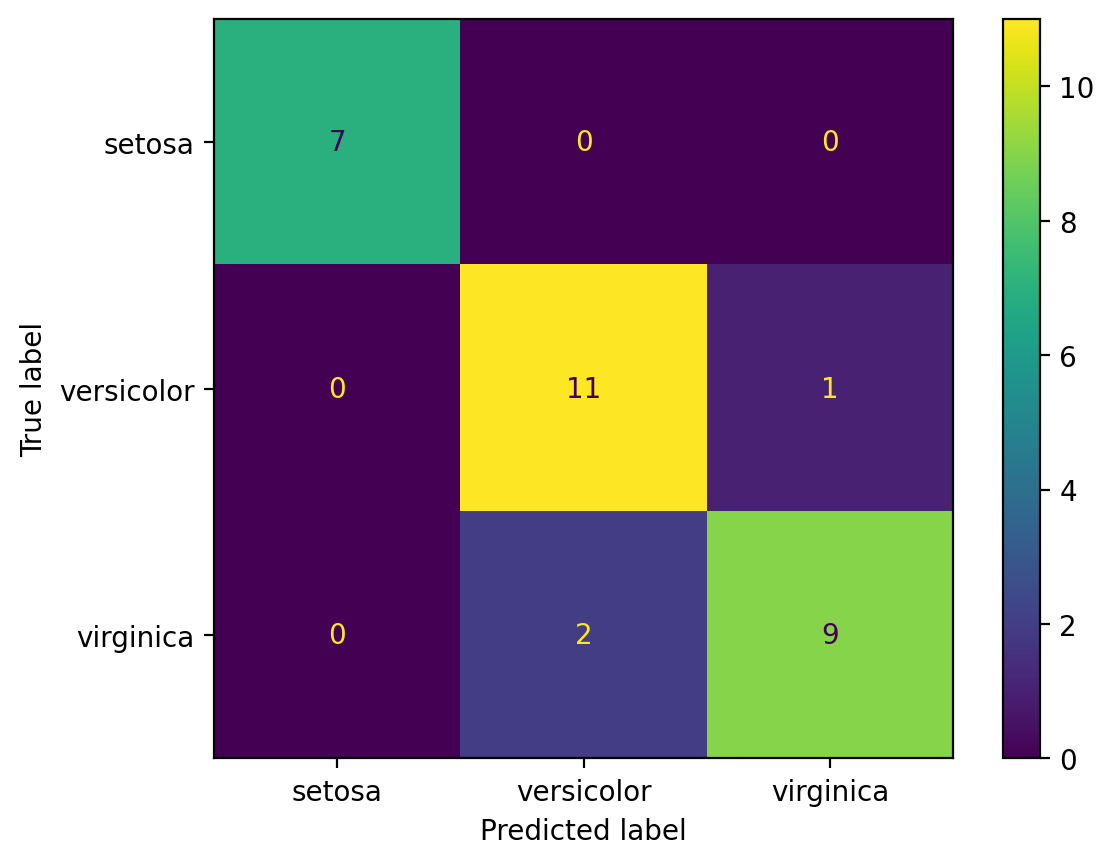

In [45]:
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

In [44]:
labels=df.species.unique()
dcm=pd.DataFrame(cm, index=labels, columns=labels)
dcm

,setosa,versicolor,virginica
setosa,7,0,0
versicolor,0,11,1
virginica,0,2,9


In [46]:
print(accuracy_score(y_test, y_pred))

0.9


In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.85      0.92      0.88        12
   virginica       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



## Logistic Regression

In [48]:
model_b = LogisticRegression()
model_b

LogisticRegression()

In [49]:
model_b.fit(X_train, y_train)

c:\Users\prasert\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
model_b.score(X_train, y_train)

0.9916666666666667

In [51]:
model_b.score(X_test, y_test)

0.8666666666666667

In [52]:
y_pred_b = model_b.predict(X_test)
y_pred_b

array(['virginica', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica'],
      dtype=object)

In [55]:
cm=confusion_matrix(y_test, y_pred_b)
cm

array([[ 7,  0,  0],
       [ 0, 10,  2],
       [ 0,  2,  9]], dtype=int64)

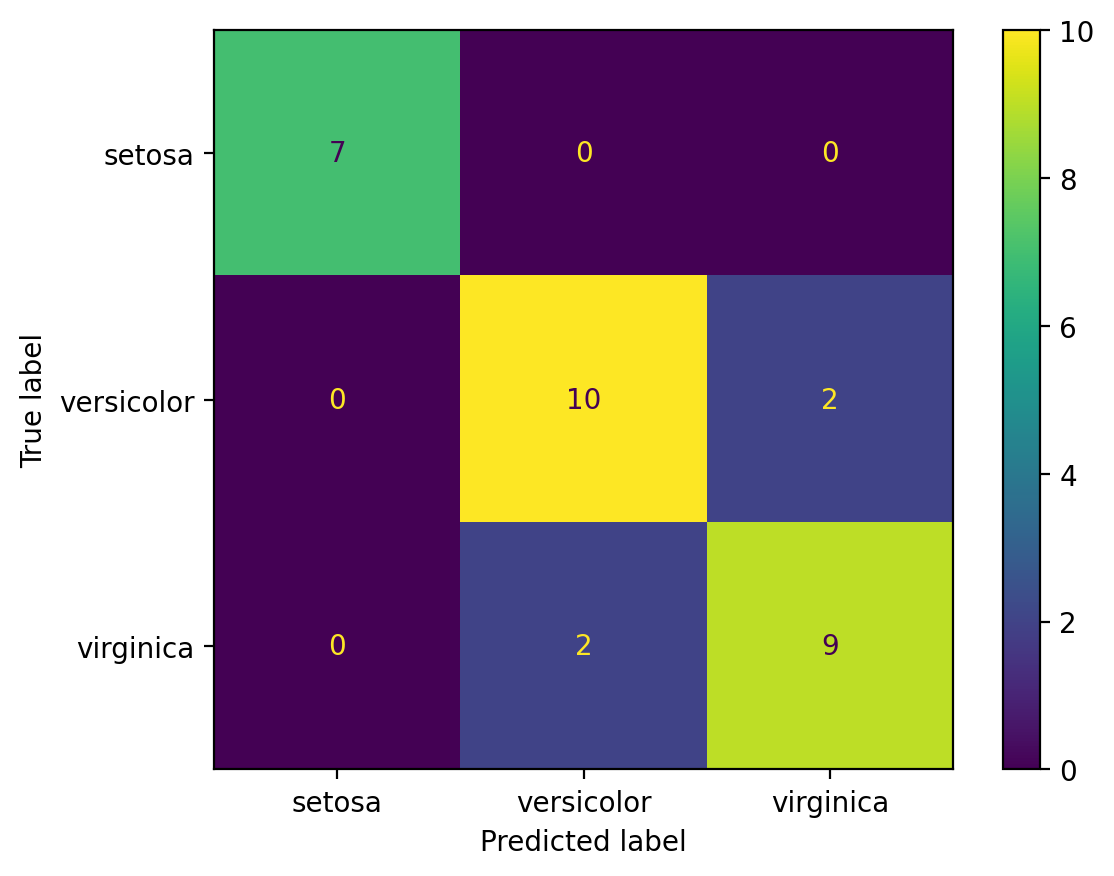

In [56]:
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

In [57]:
print(accuracy_score(y_test, y_pred_b))

0.8666666666666667


In [58]:
print(classification_report(y_test, y_pred_b))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.83      0.83      0.83        12
   virginica       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.87      0.87      0.87        30

